In [20]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import elastic net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV


In [21]:
# load datset
df = pd.read_csv('/content/TV_show_data.csv')
df.head()

,Name,Summary,Average Runtime,End Date,Premiere Date,Genres,Type,Language,Network,Rating,Schedule (days),Schedule (time),Total Seasons,Total Episodes,Character Names,Person Names,Official Site
0,Breaking Bad,"Breaking Bad follows protagonist Walter White,...",60.0,2008-01-20,2019-10-11,"['Drama', 'Crime', 'Thriller']",Scripted,English,AMC,9.2,['Sunday'],22:00,5,62,"0-Walter White, 1-Jesse Pinkman, 2-Skyler Whit...","0-Bryan Cranston, 1-Aaron Paul, 2-Anna Gunn, 3...",http://www.amc.com/shows/breaking-bad
1,Firefly,"Five hundred years in the future, a renegade c...",64.0,2002-09-20,2002-12-20,"['Drama', 'Adventure', 'Science-Fiction']",Scripted,English,FOX,9.0,['Friday'],20:00,1,14,"0-Captain Malcolm ""Mal"" Reynolds, 1-Zoe Alleyn...","0-Nathan Fillion, 1-Gina Torres, 2-Alan Tudyk,...",NaN
2,Avatar: The Last Airbender,Water. Earth. Fire. Air. Only the Avatar was t...,30.0,2005-02-21,2008-07-19,"['Action', 'Adventure', 'Fantasy']",Animation,English,Nickelodeon,8.9,['Saturday'],11:00,3,61,"0-Aang, 1-Katara, 2-Sokka, 3-Zuko, 4-Appa, 5-M...","0-Zach Tyler, 1-Mae Whitman, 2-Jack De Sena, 3...",https://www.nick.com/shows/avatar
3,Sherlock,Sherlock Holmes and Dr. John Watson's adventur...,90.0,2010-07-25,2017-01-15,"['Drama', 'Crime', 'Mystery']",Scripted,English,BBC One,8.9,['Sunday'],21:00,4,12,"0-Sherlock Holmes, 1-Dr. John Watson","0-Benedict Cumberbatch, 1-Martin Freeman",http://www.bbc.co.uk/programmes/b018ttws
4,Attack on Titan,"Known in Japan as Shingeki no Kyojin, many yea...",26.0,2013-04-07,2023-11-04,"['Action', 'Adventure', 'Anime', 'Fantasy']",Animation,Japanese,NHK,8.9,['Saturday'],00:10,4,89,"0-Mikasa Ackerman, 1-Armin Arlert, 2-Eren Jaeger","0-Yui Ishikawa, 1-Marina Inoue, 2-Yûki Kaji",http://shingeki.tv/


In [22]:
# preprocess data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1533 non-null   object 
 1   Summary          1533 non-null   object 
 2   Average Runtime  1532 non-null   float64
 3   End Date         1532 non-null   object 
 4   Premiere Date    1377 non-null   object 
 5   Genres           1533 non-null   object 
 6   Type             1533 non-null   object 
 7   Language         1533 non-null   object 
 8   Network          1464 non-null   object 
 9   Rating           1255 non-null   float64
 10  Schedule (days)  1533 non-null   object 
 11  Schedule (time)  1366 non-null   object 
 12  Total Seasons    1533 non-null   int64  
 13  Total Episodes   1533 non-null   int64  
 14  Character Names  1376 non-null   object 
 15  Person Names     1376 non-null   object 
 16  Official Site    783 non-null    object 
dtypes: float64(2),

In [23]:
# checking null values
df.isnull().sum()

Name                 0
Summary              0
Average Runtime      1
End Date             1
Premiere Date      156
Genres               0
Type                 0
Language             0
Network             69
Rating             278
Schedule (days)      0
Schedule (time)    167
Total Seasons        0
Total Episodes       0
Character Names    157
Person Names       157
Official Site      750
dtype: int64

In [24]:
# encode data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def encode(df):
  for column in df.columns:
    if df[column].dtype == np.number:
      continue
    df[column] = le.fit_transform(df[column])
  return df

df = encode(df)
df.head()

,Name,Summary,Average Runtime,End Date,Premiere Date,Genres,Type,Language,Network,Rating,Schedule (days),Schedule (time),Total Seasons,Total Episodes,Character Names,Person Names,Official Site
0,202,261,60.0,539,1098,154,6,2,3,9.2,19,48,4,62,1266,236,78
1,426,486,64.0,300,174,123,6,2,47,9.0,1,36,0,14,174,1027,782
2,103,1435,30.0,390,309,4,0,2,87,8.9,18,16,2,61,2,1361,738
3,1033,1069,90.0,683,965,149,6,2,11,8.9,19,41,3,12,1146,171,157
4,101,783,26.0,949,1191,0,0,5,78,8.9,18,1,3,89,885,1358,51


In [25]:
# impute missing values
df['Average Runtime'] = df['Average Runtime'].fillna(df['Average Runtime'].mean())
df['End Date'] = df['End Date'].fillna(df['End Date'].mean())
df['Premiere Date'] = df['Premiere Date'].fillna(df['Premiere Date'].mean())
df['Network'] = df['Network'].fillna(df['Network'].mean())
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Schedule (time)'] = df['Schedule (time)'].fillna(df['Schedule (time)'].mean())
df['Character Names'] = df['Character Names'].fillna(df['Character Names'].mean())
df['Person Names'] = df['Person Names'].fillna(df['Person Names'].mean())
df['Official Site'] = df['Official Site'].fillna(df['Official Site'].mean())

In [26]:
df.head()

,Name,Summary,Average Runtime,End Date,Premiere Date,Genres,Type,Language,Network,Rating,Schedule (days),Schedule (time),Total Seasons,Total Episodes,Character Names,Person Names,Official Site
0,202,261,60.0,539,1098,154,6,2,3,9.2,19,48,4,62,1266,236,78
1,426,486,64.0,300,174,123,6,2,47,9.0,1,36,0,14,174,1027,782
2,103,1435,30.0,390,309,4,0,2,87,8.9,18,16,2,61,2,1361,738
3,1033,1069,90.0,683,965,149,6,2,11,8.9,19,41,3,12,1146,171,157
4,101,783,26.0,949,1191,0,0,5,78,8.9,18,1,3,89,885,1358,51


In [27]:
df.isnull().sum()

Name               0
Summary            0
Average Runtime    0
End Date           0
Premiere Date      0
Genres             0
Type               0
Language           0
Network            0
Rating             0
Schedule (days)    0
Schedule (time)    0
Total Seasons      0
Total Episodes     0
Character Names    0
Person Names       0
Official Site      0
dtype: int64

In [31]:
# train test split
from sklearn.model_selection import train_test_split

# Select all columns except 'Rating' for features
X = df.drop('Rating', axis=1)

# Select the 'Rating' column as the target
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
y

0       9.200000
1       9.000000
2       8.900000
3       8.900000
4       8.900000
          ...   
1528    7.391554
1529    7.391554
1530    7.391554
1531    7.391554
1532    7.391554
Name: Rating, Length: 1533, dtype: float64

Mean Squared Error: 0.6125241645744137
R-squared: 0.1085529855655396


Text(0.5, 1.0, 'Elastic Net Regression')

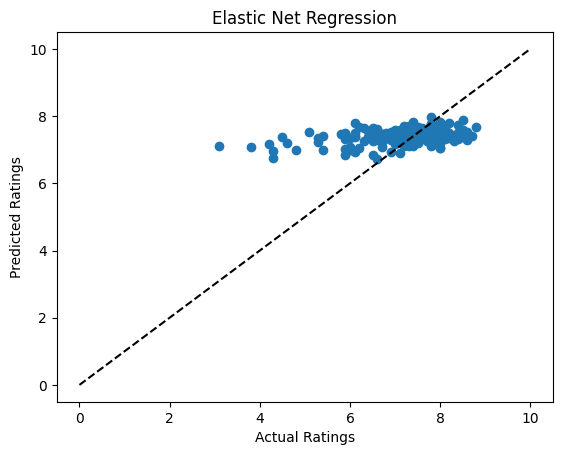

In [34]:
# model training
# elastic net regression for feature selection
from sklearn.linear_model import ElasticNetCV

model = ElasticNetCV(cv=5, random_state=0)
model.fit(X_train, y_train)

# predict on test set
y_pred = model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# plot predicted vs. actual ratings
plt.scatter(y_test, y_pred)
plt.plot([0, 10], [0, 10], '--k')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Elastic Net Regression')

Feature: 0, Score: -0.00005
Feature: 1, Score: 0.00006
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00039
Feature: 4, Score: 0.00006
Feature: 5, Score: -0.00120
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00100
Feature: 9, Score: -0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: -0.00235
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00002
Feature: 15, Score: -0.00037


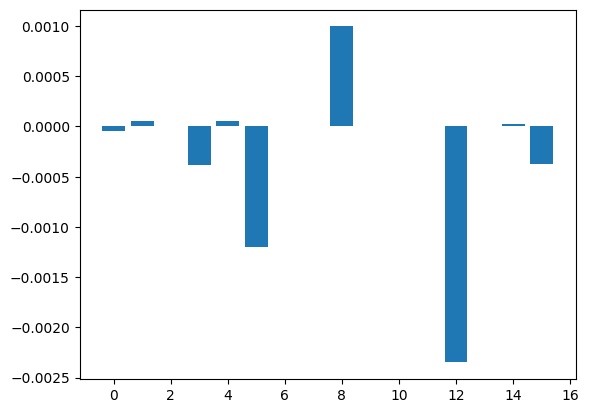

In [35]:
# check for feature importance
importance = model.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [36]:
# make an dataset with feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance

,Feature,Importance
0,Name,-0.000046
1,Summary,0.000056
2,Average Runtime,-0.000000
3,End Date,-0.000387
4,Premiere Date,0.000056
5,Genres,-0.001197
6,Type,-0.000000
7,Language,0.000000
8,Network,0.000996
9,Schedule (days),-0.000000


In [37]:
# make an dataset with only which feature that more important
important_features = feature_importance[feature_importance['Importance'] != 0]
important_features

,Feature,Importance
0,Name,-0.000046
1,Summary,0.000056
3,End Date,-0.000387
4,Premiere Date,0.000056
5,Genres,-0.001197
8,Network,0.000996
12,Total Episodes,-0.002350
13,Character Names,0.000006
14,Person Names,0.000025
15,Official Site,-0.000373
